# Feature Selection

Kita akan mencoba mencari feature yang paling cocok untuk model yang akan kita gunakankan
untung mengurangi kemungkinan overfit


In [28]:
import pandas as pd
import numpy as np

## Load dataset yang sudah dibersihkan

In [31]:
dataset = pd.read_csv('../data/clean_ftkp.csv')
dataset = dataset.filter(items=['Bobot', 'Provinsi FKTP', 'Kepemilikan FKTP',
       'Jenis FKTP', 'Tipe FKTP', 'Tingkat Pelayanan FKTP', 'Jenis Poli FKTP',
       'Segmen Peserta saat akses layanan FKTP',
       'Kode dan nama diagnosis ICD 10 (3 digit)',
       'Provinsi faskes tujuan rujukan',
       'Kabupaten/Kota faskes tujuan rujukan',
       'Kepemilikan faskes tujuan rujukan', 'Jenis faskes tujuan rujukan',
       'Tipe faskes tujuan rujukan', 'Poli faskes tujuan rujukan',
       'Jenis Kunjungan FKTP', 'Provinsi',
       'Kepemilikan', 'Jenis', 'Tipe', 'Tingkat Pelayanan', 'Jenis Poli',
       'Segemen Akses', 'Provinsi faskes tujuan rujukan label',
       'Kepemilikan faskes tujuan rujukan label',
       'Jenis faskes tujuan rujukan label', 'Tipe faskes tujuan rujukan label',
       'Poli faskes tujuan rujukan label', 'Jenis Kunjungan FKTP label',
       'Kelas Status Pulang Peserta Encoded'])
dataset.shape

(4056898, 30)

In [36]:
dataset['Tipe faskes tujuan rujukan label'] = dataset['Tipe faskes tujuan rujukan label'].fillna(98)
dataset['Jenis Poli FKTP'] = dataset['Tipe faskes tujuan rujukan label'].fillna(9999)
dataset.isnull().sum()

Bobot                                       0
Provinsi FKTP                               0
Kepemilikan FKTP                            0
Jenis FKTP                                  0
Tipe FKTP                                   0
Tingkat Pelayanan FKTP                      0
Jenis Poli FKTP                             0
Segmen Peserta saat akses layanan FKTP      0
Kode dan nama diagnosis ICD 10 (3 digit)    0
Provinsi faskes tujuan rujukan              0
Kabupaten/Kota faskes tujuan rujukan        0
Kepemilikan faskes tujuan rujukan           0
Jenis faskes tujuan rujukan                 0
Tipe faskes tujuan rujukan                  0
Poli faskes tujuan rujukan                  0
Jenis Kunjungan FKTP                        0
Provinsi                                    0
Kepemilikan                                 0
Jenis                                       0
Tipe                                        0
Tingkat Pelayanan                           0
Jenis Poli                        

## Mempesiapkan data

In [37]:
y = dataset['Kelas Status Pulang Peserta Encoded']
X = dataset.copy().drop(['Kelas Status Pulang Peserta Encoded'], axis=1)

## Filter method dengan CHI square

In [21]:
from sklearn.feature_selection import chi2

In [38]:
chi_best = chi2(X, y)

In [39]:
chi_best

(array([1.41663134e+03, 8.44099589e+03, 8.42827255e+05, 1.91528071e+05,
        1.33705716e+05, 7.42442196e+03, 7.50515073e+04, 1.47723026e+05,
        1.86536782e+06, 8.06864581e+05, 8.14723866e+07, 1.79351818e+06,
        2.02522063e+06, 9.50744001e+05, 1.95258232e+02, 6.48965566e+05,
        1.12112482e-02, 6.09294797e+00, 2.02075211e+00, 1.52272622e-01,
        7.44257310e-01, 7.50515073e+04, 8.24232316e-04, 9.88976999e-01,
        2.73132794e+04, 6.20931847e+04, 7.50515073e+04, 2.01418218e+02,
        2.55644919e+06]),
 array([5.10998003e-310, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 0.00000000e+000, 0.00000000e+000,
        0.00000000e+000, 0.00000000e+000, 2.26283311e-044, 0.00000000e+000,
        9.15675038e-001, 1.35722453e-002, 1.55162271e-001, 6.96372951e-001,
        3.88300513e-001, 0.00000000e+000, 9.77096322e-001, 3.19992533e-001,
        0.0000

In [40]:
best_values = pd.Series(chi_best[1])
best_values.index = X.columns
best_values

Bobot                                       5.109980e-310
Provinsi FKTP                                0.000000e+00
Kepemilikan FKTP                             0.000000e+00
Jenis FKTP                                   0.000000e+00
Tipe FKTP                                    0.000000e+00
Tingkat Pelayanan FKTP                       0.000000e+00
Jenis Poli FKTP                              0.000000e+00
Segmen Peserta saat akses layanan FKTP       0.000000e+00
Kode dan nama diagnosis ICD 10 (3 digit)     0.000000e+00
Provinsi faskes tujuan rujukan               0.000000e+00
Kabupaten/Kota faskes tujuan rujukan         0.000000e+00
Kepemilikan faskes tujuan rujukan            0.000000e+00
Jenis faskes tujuan rujukan                  0.000000e+00
Tipe faskes tujuan rujukan                   0.000000e+00
Poli faskes tujuan rujukan                   2.262833e-44
Jenis Kunjungan FKTP                         0.000000e+00
Provinsi                                     9.156750e-01
Kepemilikan   

In [41]:
best_values.sort_index(ascending=False)[:50]

Tipe faskes tujuan rujukan label             0.000000e+00
Tipe faskes tujuan rujukan                   0.000000e+00
Tipe FKTP                                    0.000000e+00
Tipe                                         6.963730e-01
Tingkat Pelayanan FKTP                       0.000000e+00
Tingkat Pelayanan                            3.883005e-01
Segmen Peserta saat akses layanan FKTP       0.000000e+00
Segemen Akses                                9.770963e-01
Provinsi faskes tujuan rujukan label         3.199925e-01
Provinsi faskes tujuan rujukan               0.000000e+00
Provinsi FKTP                                0.000000e+00
Provinsi                                     9.156750e-01
Poli faskes tujuan rujukan label             1.024119e-45
Poli faskes tujuan rujukan                   2.262833e-44
Kode dan nama diagnosis ICD 10 (3 digit)     0.000000e+00
Kepemilikan faskes tujuan rujukan label      0.000000e+00
Kepemilikan faskes tujuan rujukan            0.000000e+00
Kepemilikan FK

## Filter dengan feature whiz

Bagaimana cara kerjanya?
Featurewiz menggunakan algoritma SULOV dan Recursive XGBoost untuk mengurangi fitur untuk memilih fitur terbaik untuk model.

### SULOV
SULOV berarti Mencari Daftar Variabel yang Tidak Berkorelasi. Algoritma bekerja dalam langkah-langkah berikut.

- Langkah pertama: temukan semua pasangan variabel yang sangat berkorelasi melebihi ambang batas korelasi (katakanlah absolute(0.8)).
- Langkah kedua: temukan Mutual Information Score mereka ke variabel target. Mutual Information Score adalah metode penilaian non-parametrik. Jadi cocok untuk semua jenis variabel dan target.
- Langkah ketiga: ambil masing-masing pasangan variabel yang berkorelasi, lalu hilangkan satu dengan Skor Informasi Reksa yang lebih rendah.
- Langkah terakhir: Kumpulkan yang memiliki skor Informasi tertinggi dan korelasi paling rendah satu sama lain.
### XGBoost Rekursif
Setelah memilih fitur dengan korelasi yang lebih sedikit dan skor informasi timbal balik yang tinggi, XGBoost Rekursif digunakan untuk menemukan fitur terbaik di antara fitur yang tersisa. Berikut adalah cara kerjanya.

- Langkah pertama: Pilih semua fitur dalam dataset dan pisahkan dataset menjadi train dan valid set.
- Langkah kedua: Temukan fitur X teratas di kereta menggunakan valid untuk pemberhentian awal (untuk mencegah overfitting).
- Langkah ketiga: Ambil rangkaian fitur berikutnya dan temukan X teratas.
- Langkah terakhir: Ulangi ini 5 kali dan terakhir gabungkan semua fitur yang dipilih dan hapus duplikatnya.

In [42]:
from featurewiz import featurewiz

Imported 0.2.02 version. Select nrows to a small number when running on huge datasets.
output = featurewiz(dataname, target, corr_limit=0.90, verbose=2, sep=',', 
		header=0, test_data='',feature_engg='', category_encoders='',
		dask_xgboost_flag=False, nrows=None, skip_sulov=False)
Create new features via 'feature_engg' flag : ['interactions','groupby','target']



############################################################################################
############       F A S T   F E A T U R E  E N G G    A N D    S E L E C T I O N ! ########
# Be judicious with featurewiz. Don't use it to create too many un-interpretable features! #
############################################################################################
Correlation Limit = 0.7
Skipping feature engineering since no feature_engg input...
Skipping category encoding since no category encoders specified in input...
#### Single_Label Binary_Classification problem ####
    Loaded train data. Shape = (1000, 30)
    Some column names had special characters which were removed...
#### Single_Label Binary_Classification problem ####
No test data filename given...
#######################################################################################
######################## C L A S S I F Y I N G  V A R I A B L E S  ####################
##############################################

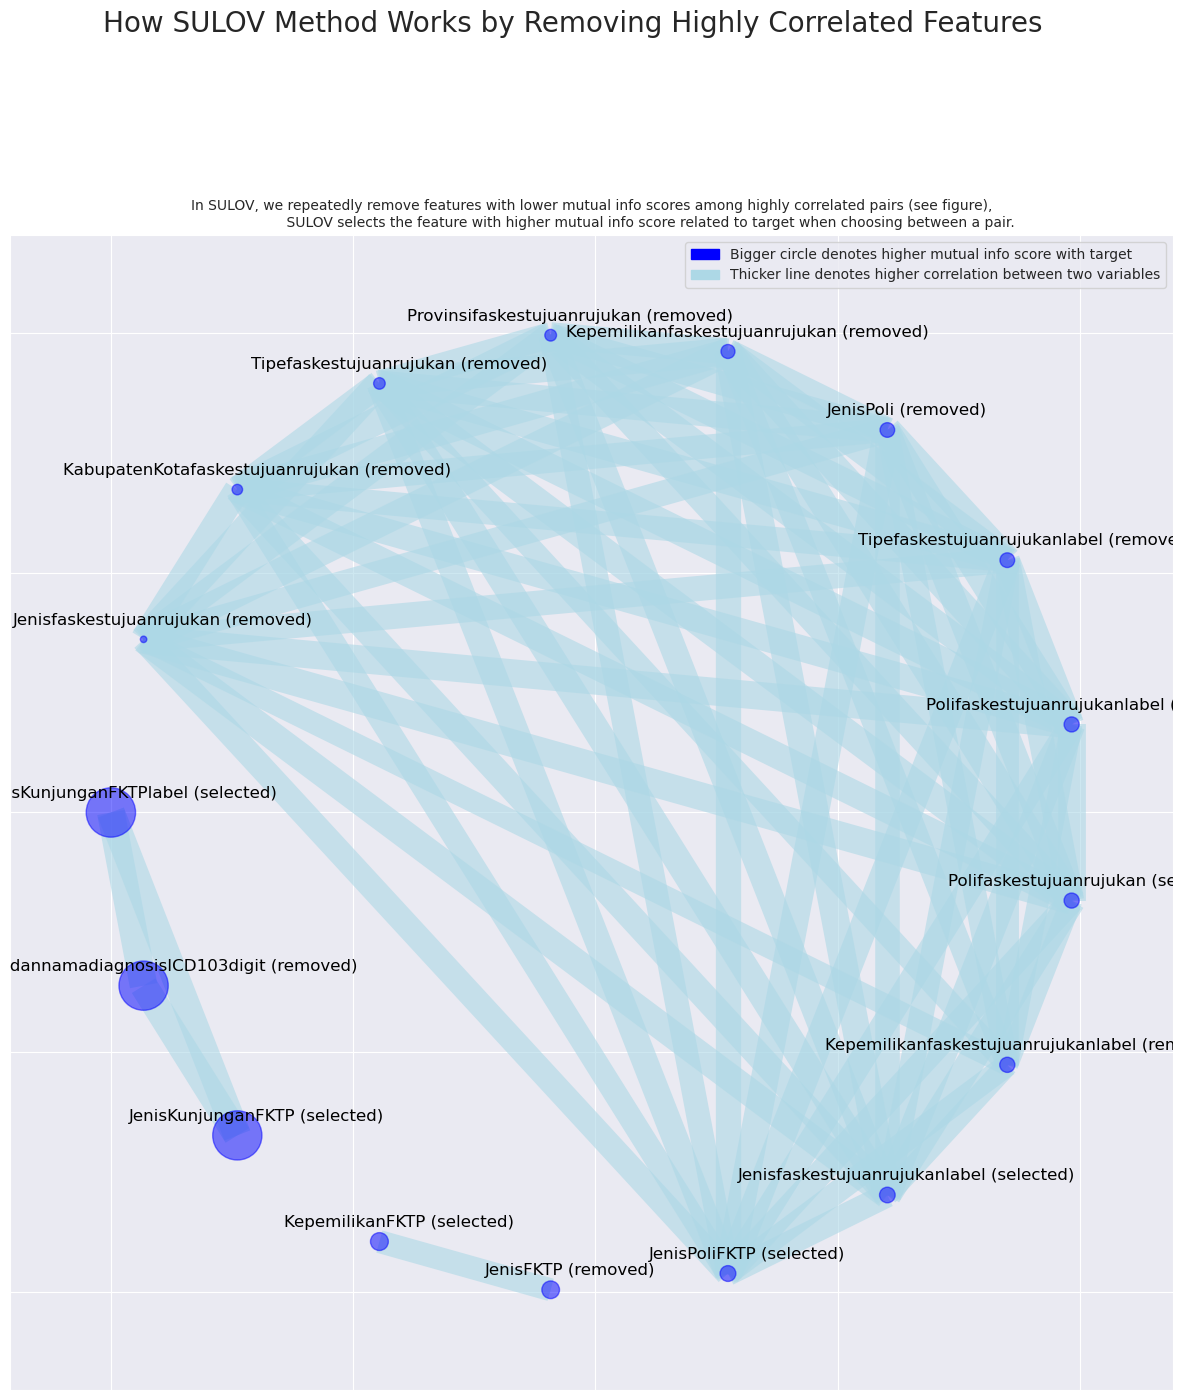

Time taken for SULOV method = 1 seconds
    Adding 0 categorical variables to reduced numeric variables  of 11
Final list of selected 11 vars after SULOV = ['Bobot', 'ProvinsiFKTP', 'SegmenPesertasaatakseslayananFKTP', 'TingkatPelayananFKTP', 'TipeFKTP', 'JenisKunjunganFKTPlabel', 'JenisKunjunganFKTP', 'KepemilikanFKTP', 'JenisPoliFKTP', 'Jenisfaskestujuanrujukanlabel', 'Polifaskestujuanrujukan']
Converting all features to numeric before sending to XGBoost...
#######################################################################################
#####    R E C U R S I V E   X G B O O S T : F E A T U R E   S E L E C T I O N  #######
#######################################################################################
    using regular XGBoost
Current number of predictors before recursive XGBoost = 11 
    Taking top 5 features per iteration...
    XGBoost version using 1.6.2 as tree method: hist
Number of booster rounds = 100
        using 11 variables...
            selecting 2 featu

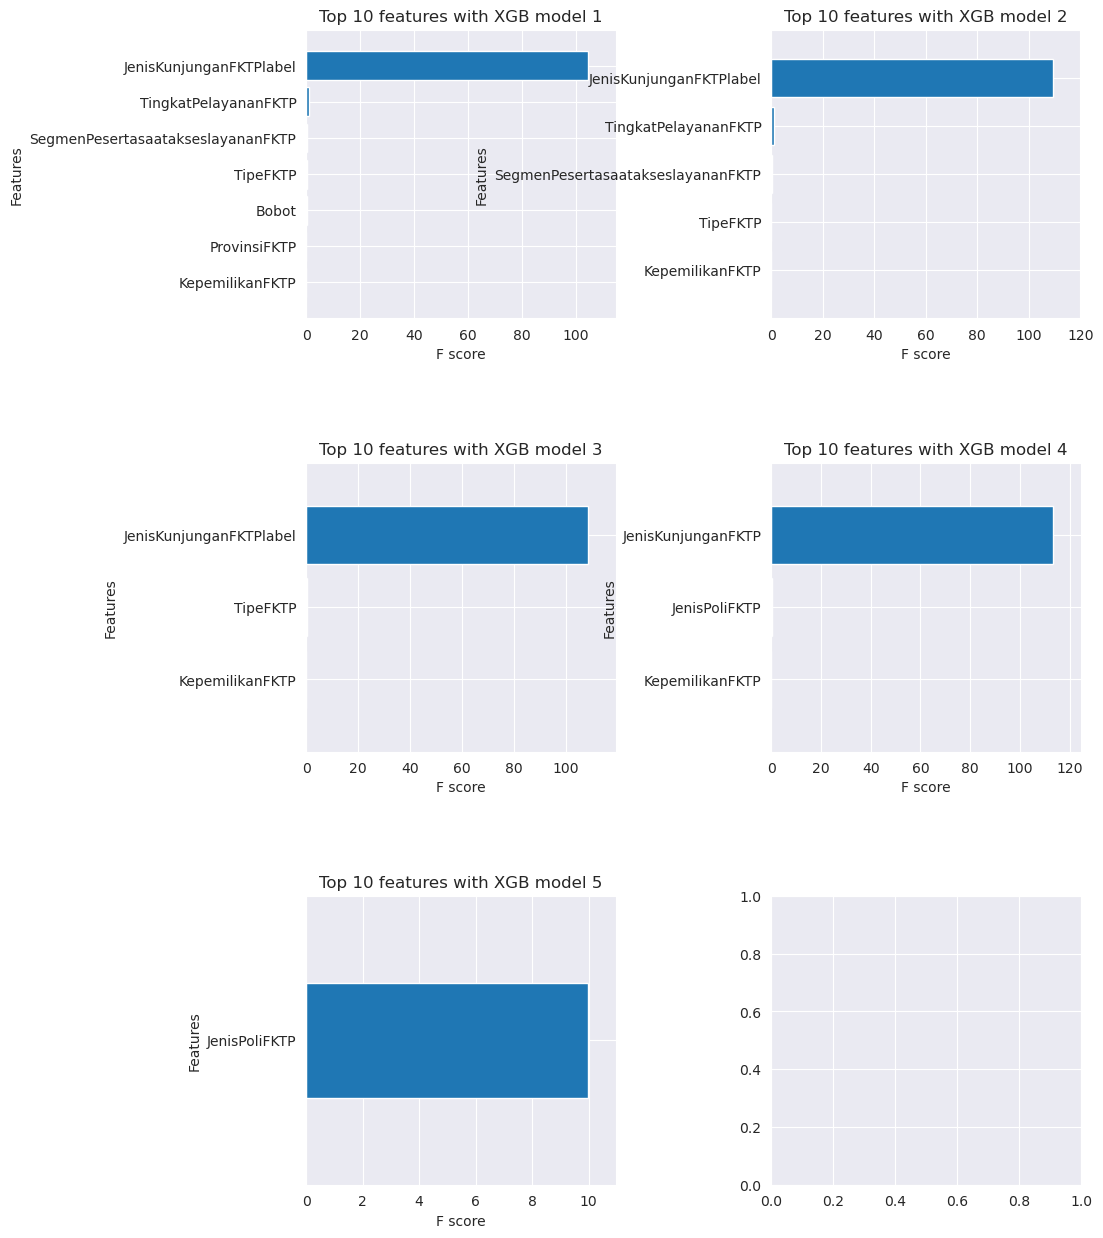

    Completed XGBoost feature selection in 1 seconds
#######################################################################################
#####          F E A T U R E   S E L E C T I O N   C O M P L E T E D            #######
#######################################################################################
Selected 4 important features:
['JenisKunjunganFKTPlabel', 'TingkatPelayananFKTP', 'JenisKunjunganFKTP', 'JenisPoliFKTP']
Total Time taken for featurewiz selection = 3 seconds
Output contains a list of 4 important features and a train dataframe


In [43]:
target = 'Kelas Status Pulang Peserta Encoded'

features, train = featurewiz(dataset[:1000], target, corr_limit=0.7, verbose=2, sep=",",
header=0,test_data="", feature_engg="", category_encoders="")